#### 3. Исследовать модификации градиентного спуска.

NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)


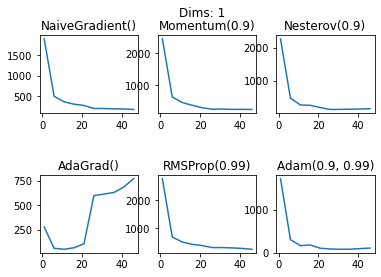

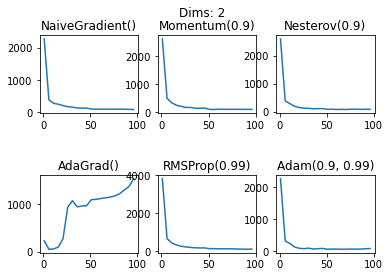

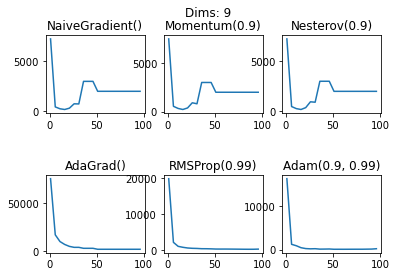

In [4]:
from matplotlib import pyplot as plt

from criteria import CountStopLossCriteria
from gradient import *
from graphic import F, F10d, F3d
from loss import AbsoluteLoss

for graphic in [F(), F3d(), F10d()]:
    count_points = graphic.points_x.shape[0]
    batch_sizes = [i for i in range(1, count_points + 1, 5)]
    n = graphic.linear.n + 1

    fig, axs = plt.subplots(2, 3)
    plt.subplots_adjust(hspace=0.8)
    fig.suptitle(f"Dims: {graphic.linear.n}")

    i_idx = 0
    j_idx = 0
    test_count = 4

    for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
                AdaGrad(n), RMSProp(n, 0.99), Adam(n, 0.9, 0.99)]:
        print(str(grad))

        w = np.array([0] * (graphic.linear.n + 1))
        epoches = np.array([[gradient(graphic, 0.1, w, AbsoluteLoss(), 1000,
                                     batch_size, CountStopLossCriteria(20), graphic.noise_sum, grad)[0]
                                for batch_size in batch_sizes]
                                for it in range(test_count)])
        epoches = np.sum(epoches, 0) / test_count

        axs[j_idx, i_idx].set_title(str(grad))
        axs[j_idx, i_idx].plot(batch_sizes, epoches)

        i_idx += 1
        j_idx += i_idx // 3
        i_idx %= 3

    plt.show()

#### 4. Исследовать сходимость алгоритмов. Сравнить различные методы по скорости сходимости, надёжности, машинным ресурсам.

In [3]:
import sys
stdout = sys.stdout
sys.stdout = stdout

from criteria import CountStopLossCriteria
from gradient import *
from graphic import F10d
from loss import AbsoluteLoss
from time import time

graphic = F10d()
n = graphic.linear.n + 1
batch_size = graphic.points_x.shape[0] // 3

for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
             AdaGrad(n), RMSProp(n, 0.999), Adam(n, 0.9, 0.99)]:
    print(str(grad))
    start = time()
    epoches, w = gradient(graphic, 0.1, np.array([0] * n), AbsoluteLoss(), 5000,
                          batch_size, CountStopLossCriteria(5), 5e-5, grad)
    print(f"Max difference of dimension: {np.max(np.abs((graphic.linear.a - w) / graphic.linear.a))}")
    print(f"Epoches(Operations): {epoches}")
    print(f"Memory: {grad.get_memory_cost(batch_size)}")
    print(f"Time: {time() - start} s")
    print()

NaiveGradient()
Max difference of dimension: 0.41297327381269056
Epoches(Operations): 1538
Memory: 0
Time: 2.588850259780884 s

Momentum(0.9)
Max difference of dimension: 0.4664966249146477
Epoches(Operations): 2607
Memory: 20
Time: 4.2310791015625 s

Nesterov(0.9)
Max difference of dimension: 1.6859334349373423
Epoches(Operations): 20000
Memory: 30
Time: 32.80745792388916 s

AdaGrad()
Max difference of dimension: 0.17034927491015334
Epoches(Operations): 486
Memory: 20
Time: 0.8050012588500977 s

RMSProp(0.999)
Max difference of dimension: 0.3864571241612536
Epoches(Operations): 5590
Memory: 30
Time: 9.302420616149902 s

Adam(0.9, 0.99)
Max difference of dimension: 0.33696276738674424
Epoches(Operations): 9421
Memory: 50
Time: 15.542828798294067 s

